In [142]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

# 1. Data Process

## 1.1 Collect Data

In [143]:
data_sg = pd.read_csv('./data/SG_data.csv')
data_us = pd.read_csv('./data/USA_data.csv')
data_cn = pd.read_csv('./data/China_data.csv')
data_all = pd.concat([data_sg, data_us, data_cn], ignore_index = True)

data = data_all
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2946 entries, 0 to 2945
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   location                         2946 non-null   object 
 1   date                             2946 non-null   object 
 2   total_cases_per_million          2946 non-null   float64
 3   new_cases_per_million            2946 non-null   float64
 4   total_deaths_per_million         2946 non-null   float64
 5   new_deaths_per_million           2946 non-null   float64
 6   stringency_index                 2946 non-null   float64
 7   hospital_beds_per_thousand       2946 non-null   float64
 8   testing_policy                   2946 non-null   int64  
 9   contact_tracing                  2946 non-null   int64  
 10  facial_coverings                 2946 non-null   int64  
 11  restrictions_internal_movements  2946 non-null   int64  
 12  international_travel

## 1.2 Check Data With The Correlation

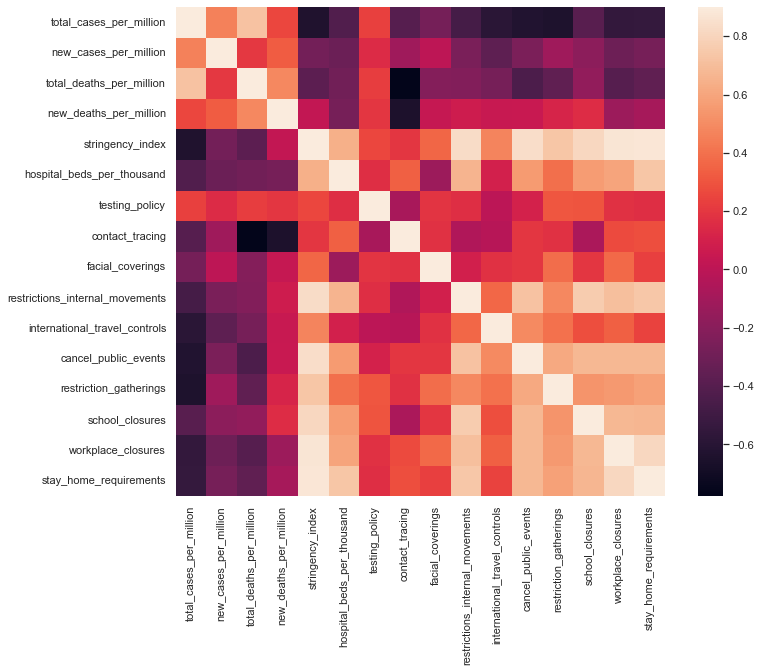

In [144]:
corr=data.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corr,vmax=0.9,square=True,linecolor='white')
plt.show()

In [145]:
# sns.set()
# c_scatter= [data.keys()[i] for i in [2,10,11,12]]
# pair_scatter=sns.pairplot(data[c_scatter],height=2.5)
# plt.show()

## 1.3 Data Split

In [146]:
y_name = 'total_cases_per_million'
# y_name = 'new_cases_per_million'

x = data.iloc[:, 6:]
y = data.loc[:, y_name]

y = np.log(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 0)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(2356, 12) (590, 12) (2356,) (590,)


# 2. Regression

In [147]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge 
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score

from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score

## 2.1 Linear Regression

### fit model

In [148]:
model_LR = LinearRegression().fit(x_train, y_train)

print(model_LR.coef_, model_LR.intercept_)

[ 0.12796677 -2.1918303   3.37595809 -2.44034186  0.70714596 -1.01568294
 -1.20157662  0.39829572 -0.69487619 -0.64590993 -0.02410784 -0.69145006] 8.17901809261328


### predict

In [149]:
y_pred = model_LR.predict(x_test)

### evaluation

In [150]:
print("MSE: {}".format(MSE(y_pred, y_test)))
print("R2: {}".format(r2_score(y_pred, y_test)))

MSE: 1.6715292042828052
R2: 0.8484312605776864


## 2.2 Ridge Regression

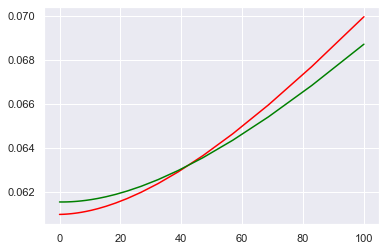

In [151]:
alphas=np.logspace(-2,2,50)
test_scores1=[]
test_scores2=[]
for alpha in alphas:
    clf=Ridge(alpha)
    scores1=np.sqrt(cross_val_score(clf,x_train,y_train,cv=5))
    scores2=np.sqrt(cross_val_score(clf,x_train,y_train,cv=10))
    test_scores1.append(1-np.mean(scores1))
    test_scores2.append(1-np.mean(scores2))
plt.plot(alphas,test_scores1,color='red')
plt.plot(alphas,test_scores2,color='green')

## 2.3 Random Forest

### compare the value of max_features

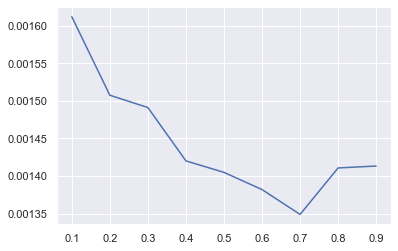

In [157]:
max_features=[.1,.2,.3,.4,.5,.6,.7,.8,.9]
# max_features=[.1,.3,.5,.7,.9]

test_scores=[]

for max_feature in max_features: 
    clf=RandomForestRegressor(max_features=max_feature,n_estimators=100)
    score=np.sqrt(cross_val_score(clf,x_train,y_train,cv=5))
    test_scores.append(1-np.mean(score))
    
plt.plot(max_features,test_scores)

### fit model

In [153]:
model_RF = RandomForestRegressor(max_features=0.7,n_estimators=100)
model_RF.fit(x_train,y_train)

RandomForestRegressor(max_features=0.7)

### predict

In [154]:
y_pred = model_RF.predict(x_test)

### evaluation

In [155]:
print("MSE: {}".format(MSE(y_pred, y_test)))
print("R2: {}".format(r2_score(y_pred, y_test)))

MSE: 0.03417131742386213
R2: 0.9972532306695551
